In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import zipfile

In [ ]:
from google.colab import files
uploaded = files.upload()

# Unzip the file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

# Load the 2019.csv file
df_2019 = pd.read_csv('extracted_folder/2019.csv')
df_2019.head()




Saving archive.zip to archive.zip


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
# Filter the relevant columns: Country, Score (Happiness score), and GDP per capita
data_2019 = df_2019[['Country or region', 'Score', 'GDP per capita']].copy()


In [ ]:
 #Standardize the data (excluding the 'Country or region' column)
scaler = StandardScaler()
X = scaler.fit_transform(data_2019[['Score', 'GDP per capita']])

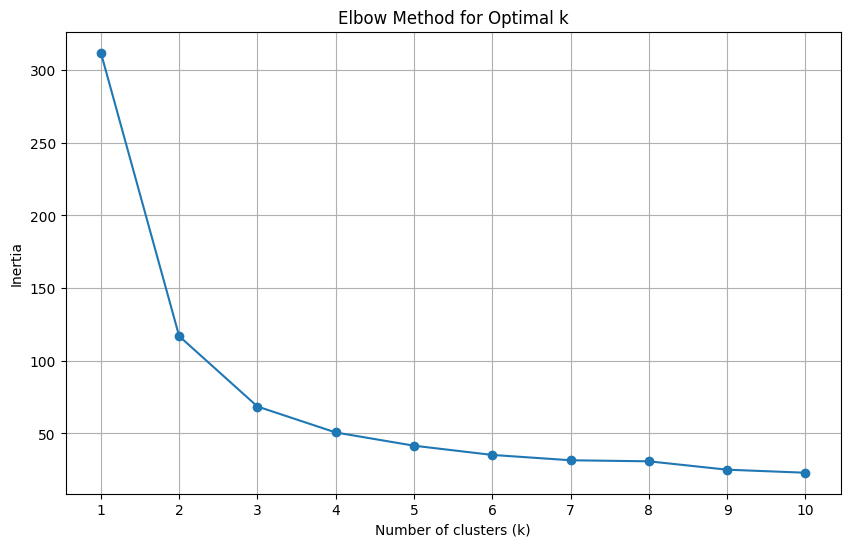

In [ ]:
# Calculate inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [ ]:
# Apply K-means clustering for 3 clusters, using the findings from the elbow method, given in the graph above
kmeans = KMeans(n_clusters=3, random_state=42)
data_2019['Cluster'] = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, data_2019['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4472718292353524


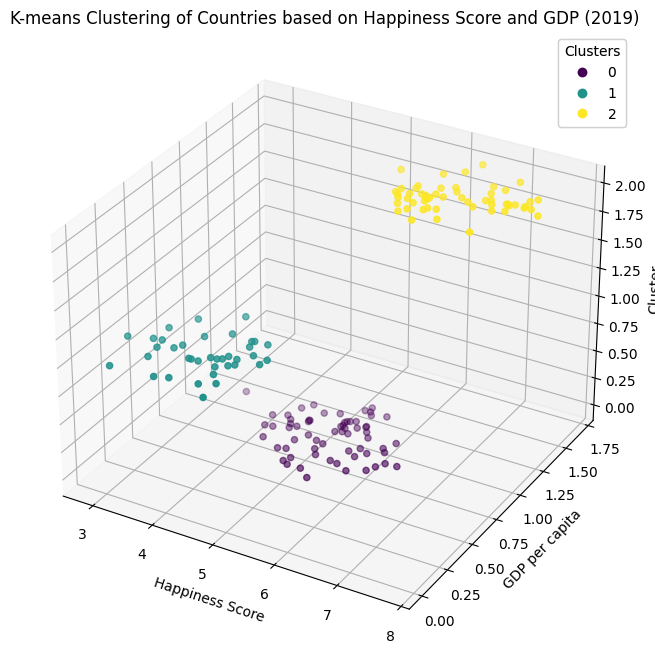

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(data_2019['Score'], data_2019['GDP per capita'],
                     data_2019['Cluster'], c=data_2019['Cluster'], cmap='viridis')

# Add labels and title
ax.set_title('K-means Clustering of Countries based on Happiness Score and GDP (2019)')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per capita')
ax.set_zlabel('Cluster')

# Show color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [ ]:
# Calculate the Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X, data_2019['Cluster'])
print(f'Davies-Bouldin Index for 3 clusters: {dbi}')

Davies-Bouldin Index for 3 clusters: 0.7461020768092844
